Assignment 4 -4. Time series prediction using RNN – stock market analysis or weather forecasting


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# 1. Load stock data (Apple as example)
data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
prices = data['Close'].values.reshape(-1, 1)

/tmp/ipython-input-519513963.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


In [4]:
# 2. Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(prices)

In [5]:
# 3. Create sequences
X, y = [], []
time_steps = 60
for i in range(time_steps, len(scaled)):
    X.append(scaled[i-time_steps:i, 0])
    y.append(scaled[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
# 4. Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
# 5. Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 6. Train
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0162
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.8682e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.1136e-04
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.0040e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.3513e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.1216e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 3.6212e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 4.3918e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 3.8428e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 3.2339e-04


In [9]:
# 7. Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


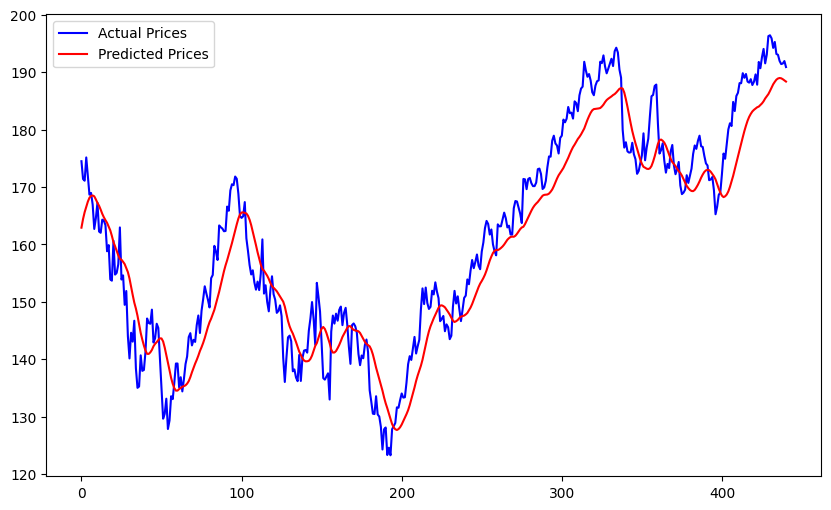

In [10]:
# 8. Plot
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10,6))
plt.plot(real_prices, color="blue", label="Actual Prices")
plt.plot(predictions, color="red", label="Predicted Prices")
plt.legend()
plt.show()